Please follow the below steps to complete the project ( 30 points)

1.	Read the dataset and understand the features and target variable. 2 points
2.	Encode independent features. 2 points
3.	Separate the dependant variable from the rest of the train data 1 point
4.	Split the dataset into training and test data ( Take 80:20 ratio). 1 points
5.	Apply PCA on the independent features of train data. 1 point
6.	Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 3 points
7.	Transform the data using PCA ( select optimum number of PCs). 2 points
8.	Apply KMeans algorithm on the above transformed data. 3 points
9.	Select optimal number of clusters and form clusters out of the train data. 5 points
10.	Create a new column in the train data and populate it with the cluster labels. 2 points
11.	Transform the test data using the same PCA object that was fit on the train data. 2 points
12.	Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 2 points
13.	Apply SVC model on train dataset and predict target for test dataset. 3 points
14.	Check accuracy and confusion matrix. 1 point

# 1.	Read the dataset and understand the features and target variable. 2 points

In [523]:
import numpy as np
import pandas as pd   
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [524]:
DF = pd.read_excel('Qualitative_Bankruptcy.data.xlsx',header=None)
DF.head()

,0,1,2,3,4,5,6
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [525]:
DF.shape

(250, 7)

In [526]:
DF.rename(columns={0: "Industrial Risk", 1: "Management Risk", 2: "Financial Flexibility",3: "Credibility",
                   4: "Competitiveness",5: "Operating Risk",6: "Class"},errors="raise",inplace=True)
DF.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [527]:
#Cardinality 
DF.apply(lambda x: len(x.unique()))      

Industrial Risk          3
Management Risk          3
Financial Flexibility    3
Credibility              3
Competitiveness          3
Operating Risk           3
Class                    2
dtype: int64

# 2.	Encode independent features. 2 points
# 3.	Separate the dependant variable from the rest of the train data 1 point

In [528]:
le = LabelEncoder()

In [529]:
X=DF.drop('Class',axis=1).values
y=DF['Class'].values

In [530]:
X[:,0]=le.fit_transform(X[:,0])
X[:,1]=le.fit_transform(X[:,1])
X[:,2]=le.fit_transform(X[:,2])
X[:,3]=le.fit_transform(X[:,3])
X[:,4]=le.fit_transform(X[:,4])
X[:,5]=le.fit_transform(X[:,5])
X

array([[2, 2, 0, 0, 0, 2],
       [1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [2, 1, 1, 1, 0, 0]], dtype=object)

In [531]:
y=le.fit_transform(y)

# 4.	Split the dataset into training and test data ( Take 80:20 ratio). 1 points

In [532]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [533]:
X_train.shape

(200, 6)

In [534]:
X_test.shape

(50, 6)

# 5.	Apply PCA on the independent features of train data. 1 point

In [535]:
X_train

array([[0, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 2, 2],
       [1, 1, 2, 2, 2, 1],
       ...,
       [2, 1, 2, 0, 0, 2],
       [0, 1, 1, 1, 1, 0],
       [0, 1, 0, 2, 2, 0]], dtype=object)

In [536]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)              
X_train_scaled = sc.transform(X_train)

In [537]:
DF_X_scaled=pd.DataFrame(X_train_scaled)

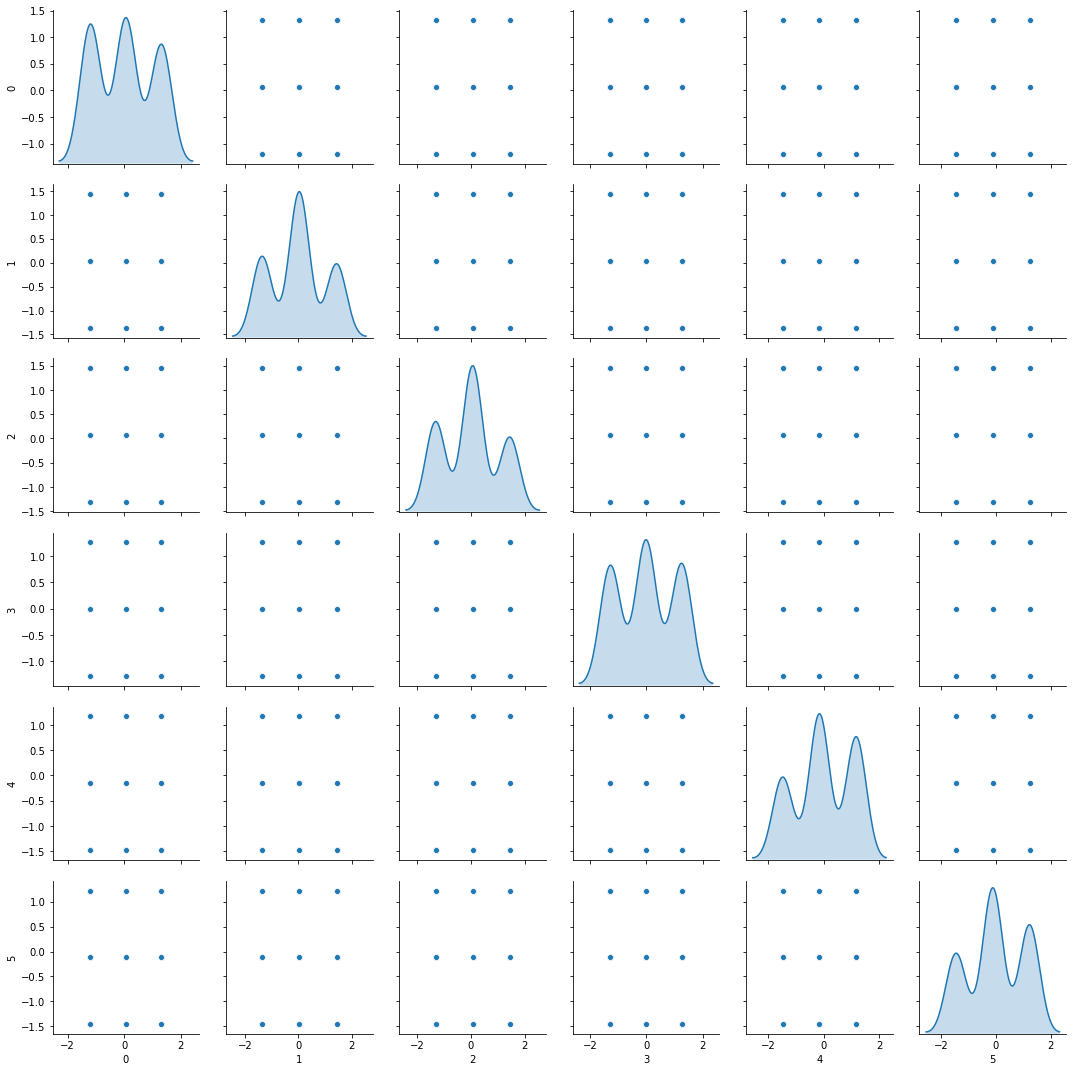

In [538]:
sns.pairplot(DF_X_scaled,diag_kind='kde')

In [539]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)

In [540]:
pca.explained_variance_ratio_

array([0.24525198, 0.20300663, 0.17191041, 0.14364607, 0.12527027,
       0.11091463])

In [541]:
pca.explained_variance_ratio_.cumsum()

array([0.24525198, 0.44825861, 0.62016903, 0.7638151 , 0.88908537,
       1.        ])

In [542]:
# Since first 5 PCs only covers 88.90% of variance, we cant drop any features 

# 6.	Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 3 points

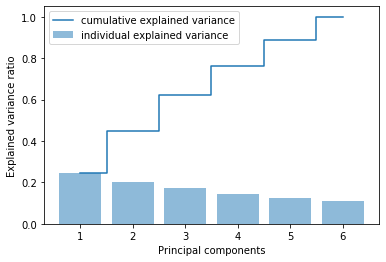

In [543]:
import matplotlib.pyplot as plt
plt.bar(range(1,7), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),pca.explained_variance_ratio_.cumsum(), where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [544]:
cov_matrix = np.cov(X_train_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [545]:
eigenvalues, eigenvectors

(array([1.47890643, 1.22416057, 1.03664572, 0.66883197, 0.86620747,
        0.7553986 ]),
 array([[-0.23732939, -0.5360147 ,  0.48315739,  0.33735792,  0.40740026,
          0.37833397],
        [-0.59325165, -0.08174399, -0.16982547,  0.56887011, -0.32577645,
         -0.42753504],
        [ 0.26567321, -0.51365616,  0.16864575, -0.08695065, -0.78069166,
          0.14175265],
        [ 0.01983168, -0.33236694, -0.83694335,  0.09345737,  0.108673  ,
          0.41002518],
        [ 0.40416981, -0.50099012, -0.08706544, -0.00752643,  0.32434473,
         -0.68761844],
        [-0.59782811, -0.28408559, -0.03496116, -0.73907042,  0.03749575,
         -0.11420866]]))

In [546]:
eigenvalues.sort()
eigenvalues[::-1]

array([1.47890643, 1.22416057, 1.03664572, 0.86620747, 0.7553986 ,
       0.66883197])

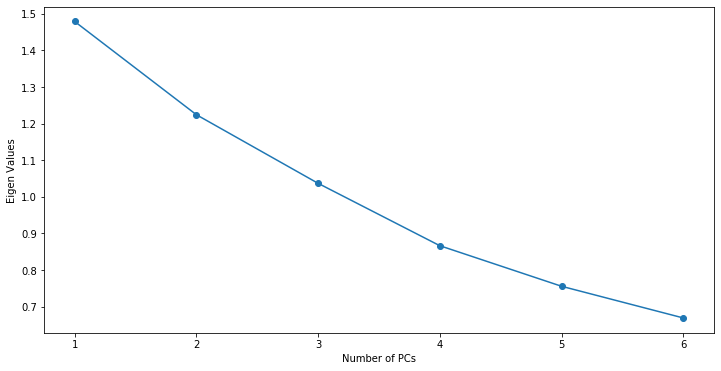

In [547]:
plt.figure(figsize=(12,6))
plt.plot( range(1,7), eigenvalues[::-1], marker = "o" )
plt.ylabel('Eigen Values')
plt.xlabel('Number of PCs')
plt.show()

# 7.	Transform the data using PCA ( select optimum number of PCs). 2 points

In [548]:
X_train_scaled_pca

array([[-1.11361585,  0.82415746, -0.30987952, -0.14988489, -0.25580271,
         1.09606735],
       [-0.02046893, -0.3327478 , -0.70862302, -0.12497562,  1.40259461,
         1.30243052],
       [-0.91457907, -1.75135088, -0.88316036, -0.60236957,  0.06200006,
        -0.10818425],
       ...,
       [ 1.30231746, -0.63712378,  2.0228014 , -1.1747204 , -1.0403266 ,
         0.67541283],
       [-1.08691099,  1.09056256, -0.49985737, -0.65432466,  0.18739283,
        -0.68670756],
       [-1.28070724,  0.71482367, -1.90588035,  0.98697813,  0.77326826,
        -0.91469027]])

In [549]:
X_train_scaled_pca_df = pd.DataFrame(X_train_scaled_pca)  # converting array to dataframe 

In [550]:
X_train_scaled_pca_df.head()

,0,1,2,3,4,5
0,-1.113616,0.824157,-0.309880,-0.149885,-0.255803,1.096067
1,-0.020469,-0.332748,-0.708623,-0.124976,1.402595,1.302431
2,-0.914579,-1.751351,-0.883160,-0.602370,0.062000,-0.108184
3,-0.764582,0.839655,1.163953,-0.281541,0.232205,-0.991013
4,0.540740,0.596204,-0.783459,-1.058353,0.936432,-0.490298


In [551]:
y_train_df=pd.DataFrame(y_train)

In [552]:
y_train_df.rename(columns={0:6},inplace=True)
y_train_df

,6
0,0
1,1
2,1
3,0
4,0
...,...
195,1
196,1
197,1
198,0


In [553]:
X_train_scaled_pca_df

,0,1,2,3,4,5
0,-1.113616,0.824157,-0.309880,-0.149885,-0.255803,1.096067
1,-0.020469,-0.332748,-0.708623,-0.124976,1.402595,1.302431
2,-0.914579,-1.751351,-0.883160,-0.602370,0.062000,-0.108184
3,-0.764582,0.839655,1.163953,-0.281541,0.232205,-0.991013
4,0.540740,0.596204,-0.783459,-1.058353,0.936432,-0.490298
...,...,...,...,...,...,...
195,-0.087401,-1.865328,-1.119950,-1.056604,0.658117,-0.901367
196,-0.593869,-1.848241,2.029307,0.137389,0.182272,1.488502
197,1.302317,-0.637124,2.022801,-1.174720,-1.040327,0.675413
198,-1.086911,1.090563,-0.499857,-0.654325,0.187393,-0.686708


In [554]:
X_train_scaled_pca_df_y = X_train_scaled_pca_df.join(y_train_df)
X_train_scaled_pca_df_y.head()

,0,1,2,3,4,5,6
0,-1.113616,0.824157,-0.309880,-0.149885,-0.255803,1.096067,0
1,-0.020469,-0.332748,-0.708623,-0.124976,1.402595,1.302431,1
2,-0.914579,-1.751351,-0.883160,-0.602370,0.062000,-0.108184,1
3,-0.764582,0.839655,1.163953,-0.281541,0.232205,-0.991013,0
4,0.540740,0.596204,-0.783459,-1.058353,0.936432,-0.490298,0


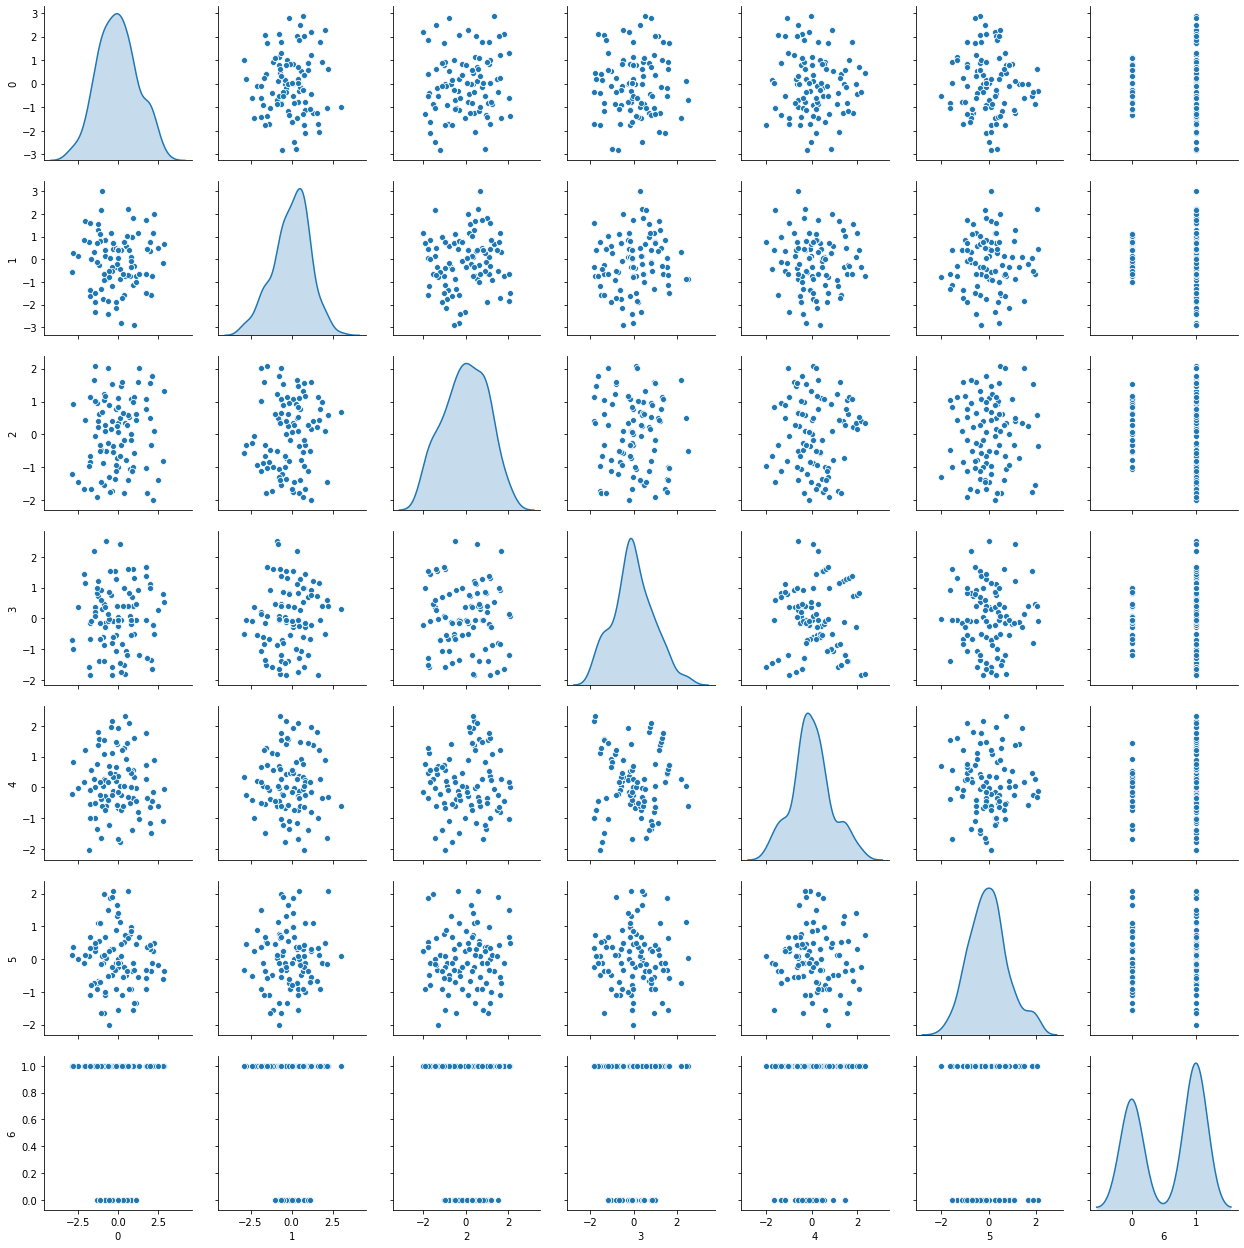

In [555]:
sns.pairplot(X_train_scaled_pca_df_y, diag_kind='kde')

# 8.	Apply KMeans algorithm on the above transformed data. 3 points

In [556]:
from sklearn.cluster import KMeans

In [557]:
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(X_train_scaled_pca_df)
    labels = clusters.labels_                     # capture the cluster lables  labels_ or .predict (it is label 0, 1, 2, 3 cluster#)
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_errors.append( clusters.inertia_ )    # capture the intertia

In [558]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [559]:
clusters_df

,num_clusters,cluster_errors
0,1,1200.000000
1,2,1007.269034
2,3,900.310901
3,4,806.128754
4,5,751.876460
5,6,693.096656
6,7,644.368628
7,8,615.500086
8,9,571.616296


# 9.	Select optimal number of clusters and form clusters out of the train data. 5 points

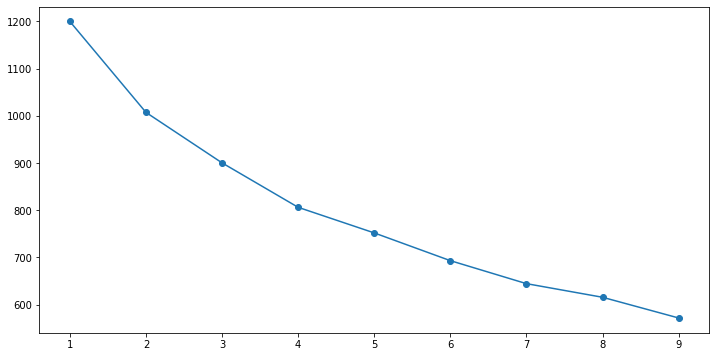

In [560]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [561]:
# From above plot, optimum number of clusters = 3

# 10.	Create a new column in the train data and populate it with the cluster labels. 2 points

In [562]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(X_train_scaled_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [563]:
centroids=kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X_train_scaled_pca_df) )   

In [564]:
centroid_df

,0,1,2,3,4,5
0,-0.671278,-1.528041,-0.038432,-0.562286,0.187448,0.000687
1,1.285746,0.100016,0.060683,-0.006574,-0.012737,-0.089272
2,-0.700385,0.510727,-0.030471,0.220239,-0.062304,0.066216


In [565]:
prediction=kmeans.predict(X_train_scaled_pca_df)
X_train_scaled_pca_df["Label"] = prediction

In [566]:
X_train_scaled_pca_df.head()

,0,1,2,3,4,5,Label
0,-1.113616,0.824157,-0.309880,-0.149885,-0.255803,1.096067,2
1,-0.020469,-0.332748,-0.708623,-0.124976,1.402595,1.302431,2
2,-0.914579,-1.751351,-0.883160,-0.602370,0.062000,-0.108184,0
3,-0.764582,0.839655,1.163953,-0.281541,0.232205,-0.991013,2
4,0.540740,0.596204,-0.783459,-1.058353,0.936432,-0.490298,1


# 11.	Transform the test data using the same PCA object that was fit on the train data. 2 points

In [567]:
X_test_scaled = sc.transform(X_test)

In [568]:
X_test_scaled_pca = pca.transform(X_test_scaled)
X_test_scaled_pca_df=pd.DataFrame(X_test_scaled_pca)
X_test_scaled_pca_df.head()

,0,1,2,3,4,5
0,-1.028549,-0.760628,1.843918,1.162084,0.224523,0.379192
1,0.042079,0.410448,0.825544,-0.062767,-1.669653,-1.541708
2,0.540740,0.596204,-0.783459,-1.058353,0.936432,-0.490298
3,-0.286438,0.710181,-0.546669,-0.604119,0.340315,0.302885
4,0.087547,-1.274625,-0.552455,2.562119,-0.464693,1.012630


# 12.	Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 2 points

In [569]:
prediction_test=kmeans.predict(X_test_scaled_pca_df)
X_test_scaled_pca_df["Label"] = prediction_test

In [570]:
X_test_scaled_pca_df.head()

,0,1,2,3,4,5,Label
0,-1.028549,-0.760628,1.843918,1.162084,0.224523,0.379192,2
1,0.042079,0.410448,0.825544,-0.062767,-1.669653,-1.541708,2
2,0.540740,0.596204,-0.783459,-1.058353,0.936432,-0.490298,1
3,-0.286438,0.710181,-0.546669,-0.604119,0.340315,0.302885,2
4,0.087547,-1.274625,-0.552455,2.562119,-0.464693,1.012630,2


# 13.	Apply SVC model on train dataset and predict target for test dataset. 3 points

In [591]:
from sklearn import svm
svm = svm.SVC(C=0.6, kernel='poly')

In [592]:
svc_model=svm.fit(X_train_scaled_pca_df,y_train)

In [593]:
svc_prediction = svc_model.predict(X_test_scaled_pca_df)

# 14.	Check accuracy and confusion matrix. 1 point

In [594]:
print('Training Accuracy = ',svc_model.score(X_train_scaled_pca_df, y_train))
print('Test Accuracy = ',svc_model.score(X_test_scaled_pca_df, y_test))

Training Accuracy =  0.935
Test Accuracy =  0.98


In [596]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(svc_prediction,y_test))

Confusion Matrix:
 [[21  1]
 [ 0 28]]


In [598]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svc_prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

